In [1]:
import pandas as pd

In [2]:
melb_data=pd.read_csv(r'D:\SarojOffice Docs-Do-not Delete\AI\AI-From-Simplilearn\Modeule-2MachineLearning\MLfromPrashantNair\Day-3\Assignment\melb_data.csv')

In [34]:
melb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
Suburb           13580 non-null object
Address          13580 non-null object
Rooms            13580 non-null int64
Type             13580 non-null object
Price            13580 non-null float64
Method           13580 non-null object
SellerG          13580 non-null object
Date             13580 non-null object
Distance         13580 non-null float64
Postcode         13580 non-null float64
Bedroom2         13580 non-null float64
Bathroom         13580 non-null float64
Car              13518 non-null float64
Landsize         13580 non-null float64
BuildingArea     7130 non-null float64
YearBuilt        8205 non-null float64
CouncilArea      12211 non-null object
Lattitude        13580 non-null float64
Longtitude       13580 non-null float64
Regionname       13580 non-null object
Propertycount    13580 non-null float64
dtypes: float64(12), int64(1), object(8)
memory usage: 2.2+ MB


In [4]:
melb_data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [ ]:
# select only the relevent features and label.
#Features:Car Parking availability, Landsize, BuildingArea, YearBuilt
#label: price

In [76]:
melb_data1=melb_data.loc[:,['Car','Landsize','BuildingArea','YearBuilt','Price']]

In [77]:
melb_data1.describe()

,Car,Landsize,BuildingArea,YearBuilt,Price
count,13518.000000,13580.000000,7130.000000,8205.000000,1.358000e+04
mean,1.610075,558.416127,151.967650,1964.684217,1.075684e+06
std,0.962634,3990.669241,541.014538,37.273762,6.393107e+05
min,0.000000,0.000000,0.000000,1196.000000,8.500000e+04
25%,1.000000,177.000000,93.000000,1940.000000,6.500000e+05
50%,2.000000,440.000000,126.000000,1970.000000,9.030000e+05
75%,2.000000,651.000000,174.000000,1999.000000,1.330000e+06
max,10.000000,433014.000000,44515.000000,2018.000000,9.000000e+06


In [78]:
melb_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 5 columns):
Car             13518 non-null float64
Landsize        13580 non-null float64
BuildingArea    7130 non-null float64
YearBuilt       8205 non-null float64
Price           13580 non-null float64
dtypes: float64(5)
memory usage: 530.6 KB


In [83]:
#Check if any features having null or missing values
#melb_data1[melb_data1.Car.isna()|melb_data1.BuildingArea.isna()|melb_data1.YearBuilt.isna()|melb_data1.Price.isna()]
melb_data1.isna().any()


Car             False
Landsize        False
BuildingArea    False
YearBuilt       False
Price           False
dtype: bool

In [81]:
#Treatment of NaN from stat perspective
melb_data1.Car.fillna(melb_data1.Car.median(),inplace=True)
melb_data1.BuildingArea.fillna(melb_data1.BuildingArea.mean(),inplace=True)
melb_data1.YearBuilt.fillna(melb_data1.YearBuilt.mode()[0],inplace=True)

In [82]:
#Treatment of NaN/Missing from domain perspective
melb_data1.Car.fillna(1,inplace=True)
melb_data1.BuildingArea.fillna(80,inplace=True)
melb_data1.YearBuilt.fillna(2000,inplace=True)

In [75]:
melb_data1.head()

,Car,Landsize,BuildingArea,YearBuilt
0,1.0,202.0,151.96765,1970.0
1,0.0,156.0,79.00000,1900.0
2,0.0,134.0,150.00000,1900.0
3,1.0,94.0,151.96765,1970.0
4,2.0,120.0,142.00000,2014.0


In [84]:
#Feature Scaling from stats perspective
features=melb_data1.drop(columns='Price')
label=melb_data1.loc[:,['Price']]

In [95]:
#Standard feature scaling
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [103]:
feature_scale=StandardScaler()
final_features=feature_scale.fit_transform(features)

In [104]:
final_features

array([[-0.63684702, -0.08931566,  0.        ,  0.11041768],
       [-1.6776922 , -0.10084297, -0.18614741, -2.29610843],
       [-1.6776922 , -0.10635603, -0.00501966, -2.29610843],
       ...,
       [ 2.48568851, -0.03067672,  0.        ,  1.03864917],
       [ 3.52653369,  0.0770786 ,  0.012838  , -1.60852954],
       [-0.63684702, -0.04922066, -0.10196127, -1.60852954]])

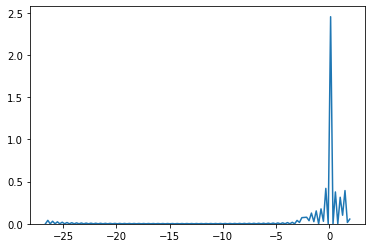

In [108]:
sns.distplot(final_features[:,3],hist=False)